# Tutorial for homework 3 in AI at National Taiwan University

### Spring 2023

<br /> <br />

<font size=3> The purpose of this tutorial is to introduce a few Python tools (mostly NumPy and Pytorch) that will be required or helpful to complete the third course assignment this semester. These tools are also widely applied to extend Python's capabilities whenever the language is used for Artificial Intelligence, data analysis, large-scale data processing, scientific computing, and others, so we hope you'll find them useful long after completing the course (or maybe you already do!). The tutorial will also introduce a few concepts not specific to Python, like vectorization or tensors.

 <br/>


# Tensors

<br />

Let's start with some maths (yay!) and introduce the concept of tensors.

We all know and love vectors (which for programmers naturally correspond to one-dimensional arrays) and matrices (corresponding to two-dimensional arrays), and tensors are a generalization of these - not necessarily to three dimensions, but to an arbitrary number. Matrices are already quite powerful in terms of what they can express - equation systems, multidimensional derivatives, linear transformations, or more real-world stuff like the state of a board game with a two-dimensional board, or connections between a group of people.

Tensors take this further, for example they allow us to naturally represent an RGB image. If we want to represent the color intensities of red, green, and blue for every pixel of an image with height 420, width 210 - let's take a tensor of shape (420, 210, 3). Then, if we want to take 32 such images and process them all at once (in a while we'll explain why we'd want to do that), we can glue them together into a tensor of shape (32, 420, 210, 3) (let's call it T).

Packing all this information into a single mathematical object is quite convenient, for example now if we want to get a negative of all these images at once, we can take another tensor W of shape (32, 420, 210, 3), whose cells all contain the number 255, and simply calculate W-T (we'll demonstrate this in a moment). However, while simplicity of representation is a great reason to use tensors, from a practical standpoint there is a more important one, and it's that tensors allow something called vectorization.

# Vectorization

The basic idea of vectorization is that doing stuff one time with one big thing is faster than doing the same stuff multiple times with smaller things (this probably sounds a bit underwhelming, but I promise it'll get interesting when we see just _how much faster_ it can get). For example, taking 32 images as a (32, 420, 210, 3) tensor and calculating their negative can be done faster than calculating 32 negatives of 32 images in a loop. Vectorization just means that we perform this one tensor operation instead of a loop. There are a few reasons for why this is faster:

+ Python libraries such as Numpy provide a Python interface to efficient operations which, under the hood, are actually partially implemented in C. We can create our tensor of images and execute a NumPy operation on it once, instead of having a Python 'for' loop with 32 iterations, one per each image. Not only do we avoid executing a loop in Python, but we also take advantage of the fact that arithmetic operations themselves are much faster in C. Since a lot of heavy computation can be expressed in vectorized form, this way we often get the best of both worlds - decent execution time unlike in pure Python, but also a convenient language that doesn't demand we define a comparison operation on a class every time we want to create something as simple as a map, and allows us to avoid drowning in leaked memory, like you do in _some other languages_.
+ This is taken to a whole new level with access to a GPU. GPUs are specialized exactly in performing vectorized computation, for example they take advantage of the fact that performing the same operation on a large number of elements can be massively parallelized. Of course the exact speedup depends on a lot of factors, but for reference, it is normal to get 100 times shorter execution times when using a GPU compared to a CPU.

In practice, NumPy and other packages achieve even more speedup, since their implementation of specific operations is tailored to these operations. For example, instead of multiplying matrices as in the definition of matrix multiplication, which would mean cubic execution time with respect to matrix size, we can use some tricks to bring down the computational complexity (by the way, we don't know what the complexity of the fastest possible algorithm is - that's an open question). Again, vectorizing our computation and thus working on bigger matrices means that we can optimize more.

Having justified why NumPy is cool, let's go ahead and try it out!

# NumPy
    
We have been talking about tensors and later we'll see that they're called that in Pytorch, but in NumPy, they objects we're interested in are just called arrays - just as regular Python arrays, although they can do much more. Let's create one:
 
 </font>

In [2]:
import numpy as np  # tradition

sample_array = np.array(
    [
        [2, 1],
        [3, 7],
        [4, 2]
    ])

sample_array

array([[2, 1],
       [3, 7],
       [4, 2]])

<font size=3>  We have created an array by simply providing all of its values. Let's find out more about what we just made:  
 </font>

In [3]:
print(type(sample_array))
print(sample_array.shape)
print(sample_array.dtype)

<class 'numpy.ndarray'>
(3, 2)
int64


<font size=3>  Although we did not explicitly provide a type, NumPy went ahead and assumed that we wanted an array of integers - and not just any integers, but 64-bit ones. Unlike Python arrays, NumPy arrays cannot store objects of different types, and the library they won't pretend integer sizes don't exist, either. Instead, we can specify that we want an array of floats:  
 </font>

In [4]:
sample_float_array = np.array(
    [
        [2, 1],
        [3, 7],
        [4, 2]
    ],
    dtype=float)

sample_float_array

array([[2., 1.],
       [3., 7.],
       [4., 2.]])

<font size=3>  Well, now that we have two arrays, we should be able to add them together (something we wouldn't be able to do in Python):  
 </font>

In [5]:
sample_array + sample_float_array

array([[ 4.,  2.],
       [ 6., 14.],
       [ 8.,  4.]])

<font size=3>  or multiply them element-wise (Hadamard product): 
 </font>

In [6]:
sample_array * sample_float_array

array([[ 4.,  1.],
       [ 9., 49.],
       [16.,  4.]])

<font size=3>  If we want to perform matrix multiplication, we can use the @ operator. In this case we cannot multiply our matrices directly because of size mismatch, so let's take the transpose of one of them:
 </font>

In [7]:
sample_array @ sample_float_array.T

array([[ 5., 13., 10.],
       [13., 58., 26.],
       [10., 26., 20.]])

<font size=3>
 </font>

<font size=3> Often it's inconvenient to provide all the values when creating an array. NumPy offers ready-made functions for some often-used arrays:
</font>

In [8]:
np.zeros([3, 3, 3])

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [9]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [10]:
np.full([3, 3], -1/12)

array([[-0.08333333, -0.08333333, -0.08333333],
       [-0.08333333, -0.08333333, -0.08333333],
       [-0.08333333, -0.08333333, -0.08333333]])

 <font size=3>
Sometimes it's useful to create one array and reshape it into another:
 </font>

In [11]:
np.reshape(np.arange(0, 10), [2, 5])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

 <font size=3>
 Or create two arrays and glue (stack) them together:
 </font>

In [12]:
xs = np.repeat(np.arange(0, 4), 4)
ys = np.resize(np.arange(0, 4), 16)
stacked = np.stack([xs, ys], axis=1)  # e.g. tile coordinates of a 4x4 grid

 <font size=3>
 Now let's follow on our example from before and try to read a .jpg image (we'll use some other packages for reading and displaying, but they're not necessarily needed for the homework):
 </font>

In [13]:
from PIL import Image
from matplotlib import pyplot as plt
import cv2

image = np.asarray(cv2.imread('angry_cat.jpg'))
# If you run this notebook on your computer, you probably don't have this
# image, but you can try out your own instead.

image.shape

(403, 428, 3)

 <font size=3>

 We can see that the image is indeed represented as an array of size (height, width, number of channels) with the number of channels for a jpg image being 3. Let's see the image:
 </font>

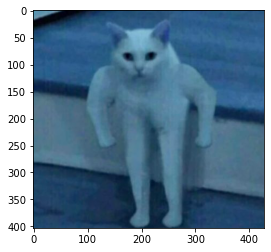

In [14]:
from matplotlib import pyplot as plt

plt.imshow(image)

 <font size=3>
 It doesn't look quite right, does it? This is because the imread function from cv2 expects an image in the BGR format, but our plotting function - RGB format. This is a good excuse to use NumPy's 'flip' function to correct our mistake. We want to reverse the order of channels (color values) for every pixel. Since channels are stored in the image array's axis number 2 (counting from 0), we can call 'flip' telling it to flip axis number 2:
 </font>

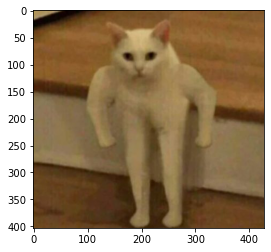

In [15]:
image = np.flip(image, axis=2)

plt.imshow(image)

 <font size=3>
And now it looks right! Now let's play around with the image using slicing. Slicing is another mechanism present in Python, but considerably extended in NumPy. For example, we can crop the image by slicing it on two axes at once:
 </font>

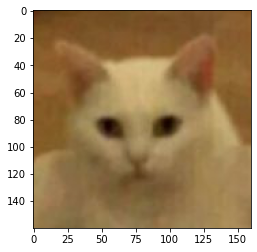

In [16]:
cropped_image = image[:160, 120 : 280, :]
plt.imshow(cropped_image)

 <font size=3> What we did here is slice out pixels with y coordinate (axis 0) less that 160, x coordinate between 120 and 279, and we took all the channels (a colon in an axis represents taking the whole axis). We can also try to zero out the green and blue channels, leaving the red channel:
 </font>

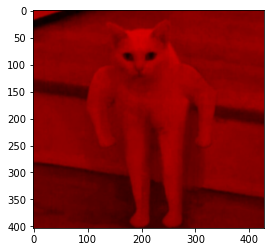

In [17]:
red_angry_cat = np.copy(image)
red_angry_cat[:, :, 1] = np.zeros(image.shape[:2])
red_angry_cat[:, :, 2] = np.zeros(image.shape[:2])
plt.imshow(red_angry_cat)

 <font size=3> We used NumPy's zero function to create a channel filled with zeros, with the same height and width as the original image. Then we assigned it to the green and blue channels of a copy of our image (the copy is important - otherwise we'd be modifying the original image). But in fact, we can do it in a more concise way:
 </font>

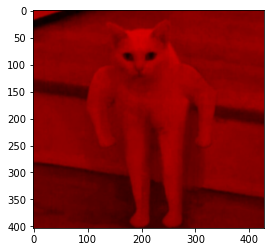

In [18]:
red_angry_cat = np.copy(image)
red_angry_cat[:, :, [1, 2]] = 0
plt.imshow(red_angry_cat)

 <font size=3>
Huh? Did we just assign an integer to a tensor? Well, mathematically this might look suspicious, but NumPy assumes the programmer is smart and they're trying to do something more sensible, which is - assigning zero to all the values in a tensor. This is something called broadcasting, and it happens when we are trying to perform an operation on two objects which have different sizes, but one of them can be replicated to be the same size as the other (well, "subject to certain constraints", as the library's documentation specifies). Here, we took zero and assigned it to all values in an array containing channels number 1 and 2 sliced out of the original image. We could also do this:
 </font>

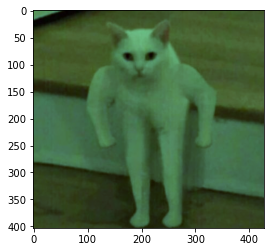

In [19]:
colored = np.copy(image)
color_vector = np.array([0.5, 1, 1])
colored = (colored * color_vector).astype(np.uint8)
plt.imshow(colored)

<font size=3>
Our color_vector, when it multiplies (element-wise) an RGB pixel, reduces the intensity of the red channel by half, and leaves the other channels unchanged. Broadcasting means the operation is applied to all the pixels in our image. Note that the multiplication introduced float values and made NumPy change the type of the array to float, so we had to cast it back to int. Finally, let us see an example of image negative, as mentioned before. With broadcasting, we can simply do it as:
</font>

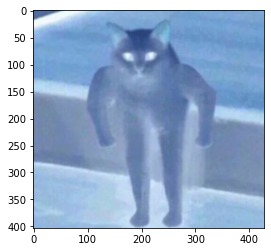

In [20]:
plt.imshow(255 - image)

<font size=3>
Let's get back to our sample_array. It still looks like this:
</font>

In [21]:
sample_array

array([[2, 1],
       [3, 7],
       [4, 2]])

<font size=3>
Now, slicing is a powerful technique, but sometimes we want to access elements not based on their position in an array, but on a certain property of their values. For this, we can use masking. Let's multiply all the even numbers in our array by two:
</font>

In [22]:
sample_array_copy = np.copy(sample_array)
sample_array_copy[sample_array_copy % 2 == 0] *= 2
sample_array_copy

array([[4, 1],
       [3, 7],
       [8, 4]])

<font size=3>
We can also take a look at the mask itself:
</font>

In [23]:
sample_array % 2 == 0

array([[ True, False],
       [False, False],
       [ True,  True]])

<font size=3>
We can note that the comparison operator on NumPy arrays doesn't return a simple True or False based on whether the results are the same, but also acts element-wise (and in this case, also it broadcast one of the sides). If we want to check if two arrays are the same, we can use the array_equal function. Finally, one more indexing method that is sometimes useful is to provide a sequence of indices for each axis, like this:
</font>

In [24]:
sample_array_copy = np.copy(sample_array)
print(sample_array_copy)
sample_array_copy[[2, 0], [1, 0]] = [100, 200]
print(sample_array_copy)

[[2 1]
 [3 7]
 [4 2]]
[[200   1]
 [  3   7]
 [  4 100]]


<font size=3>
We can see that the indices on both axes were paired up and the values [100, 200] were assigned to cells [2, 1] and [0, 0], respectively.
</font>

<font size=3> When analyzing some data, sometimes we have a matrix whose columns correspond to certain features, and rows - to some instances we're analyzing. We might want to calculate statistics like the mean value of every feature, or the mean value of a given feature for all the objects. NumPy provides functions that can work on a given axis of an array:
</font>

In [25]:
print(np.mean(sample_array_copy, axis=0)) # mean values of columns
print(np.mean(sample_array_copy, axis=1)) # mean values of rows

[69. 36.]
[100.5   5.   52. ]


<font size=3> 
Finally, let's see a real example of this dramatic speedup that NumPy promised us. Let's create two sample square matrices of size 500 and multiply them, first with a naive algorithm implemented in pure Python, and then with NumPy:
</font>

In [26]:
import time


# let's just assume these are square matrices
def naive_multiply_matrix(A, B):
    n = len(A)
    result = [[0 for _ in range(n)] for _ in range(n)]
    for col in range(n):
        for row in range(n):
            for index in range(n):
                result[col][row] += A[row][index] * B[index][col]
    return result


n = 500

X = [[i + j for i in range(n)] for j in range(n)]
Y = [[i - j for i in range(n)] for j in range(n)]

X_as_np_array = np.array(X)
Y_as_np_array = np.array(Y)

start = time.time()
naive_multiply_matrix(X, Y)
end = time.time()
print(f" naive algorithm takes {end - start} seconds")

start = time.time()
X_as_np_array @ Y_as_np_array
end = time.time()
print(f" numpy multiplication takes {end - start} seconds")


 naive algorithm takes 18.970702171325684 seconds
 numpy multiplication takes 0.08301544189453125 seconds


<font size=3> 
Now, on my laptop that's about 0.8 seconds for NumPy against 15 seconds for Python. And this is not for very big data, either! The difference would only keep getting bigger for larger matrices.

<br/> <br/>

To conclude, we have hopefully convinced you that NumPy is worth learning, and provided an introduction to some of its features. Not all of those will necessarily be useful for the homework, but there might also be useful features that have _not_ been included here, so keep googling - if there's an array operation or something similar that you think you need, chances are it's already provided by the library.
    
With that in mind, let's move on to the next part of the tutorial.
    <br/> <br/>
    
# PyTorch

</font>

<font size=3> 
    In this part of the tutorial, we will create a small, but functioning neural network for handwritten digit classification, just like we've seen in the lecture. We will train it on a part of the MNIST dataset (which can be downloaded in .jpg format from here https://www.kaggle.com/datasets/scolianni/mnistasjpg). We will have to handle creating a simple model architecture, loading the data for the model, writing a train/eval loop, and making sure our model can be run both on a GPU and a CPU. We will also see how PyTorch makes it convenient to implement a model forward pass and backpropagation with automatic differentiation.
    
<br/>
 
For a more comprehensive PyTorch tutorial, we also recommend taking a look here: https://pytorch.org/tutorials/beginner/basics/intro.html

<br/>

Let's start with the most interesting part and create our model architecture. It will consist of four fully-connected layers of neurons.

As we know from the lecture, during the forward pass of a sample through a neural network, every neuron receives some values from the neurons in the previous layer, and calculates its own value based on them. This value is then passed to the next layer of neurons. We can, then, think of the values in a given layer as a vector whose i-th feature is the value of the i-th neuron. Each layer computer a new vector based on the one received from the layer before, and passes it on to the next layer.
    
This representation is convenient, because it allows us to represent all the calculations of a single layer as taking a vector x, multiplying it by a weight matrix W, adding a bias vector b, and applying a non-linearity (sigmoid or such) element-wise to the resulting vector. What exactly are W and b? In the lecture, we have seen each neuron having its own weights vector and bias scalar. Here, we just glue the weight vectors together into a matrix, so that the weights of the i-th neuron become the i-th row of W. Similarly, we glue the bias values into a scalar with the bias from the i-th neuron becoming the i-th feature of b. This should ring a bell - we have just vectorized the calculations of a neural layer! Again, this not only gives us a concise representation of the calculations, but also - in practice - speeds them up.

The kind of transformation we have just applied to the vector (multiply by matrix W, add a vector b) is called an affine transformation. In particular, if b is also a zero vector, it's called a linear transformation (to make matters worse, lots of people say "linear" when they say "affine". To make matters worse yet, PyTorch also calls it that).

Now that we know what happens between the layers, let's specify what the input and output to our layer is (both need to be vectors, right?). For image processing, a simple technique to represent the input image as a vector is to flatten the image, i.e. take the tensor representing the image, and move all of its values into a single vector (height-wise, then width-wise, then channel-wise). In our case, we can notice that the input images are in fact all in greyscale, so to save some memory, we can first replace the channels for each pixel with their mean - we get a matrix whose i,j-th entry represents the brightness of the i,j-th pixel, and we then flatten this matrix. MNIST images have size 28x28, so we end up with a vector of length 784. This is our input vector. Therefore we want 784 neurons in the first layer.

As for the output, as commonly done for classification tasks with neural networks, we want a vector of the same length as our number of classes (here we're classifying decimal digits, so 10 classes), which has big values for classes that the network thinks are likely, and small ones for classes that it thinks are unlikely. These values are called logits, and while training, usually we calculate a class probability distribution based on them (through a function called softmax) and calculate the loss based on that distribution, so that we can perform backpropagation and improve the network. If we want to make predictions instead of training, we just take the class with the highest logit value, and that is our prediction.

Of course, this is just a high-level overview of how our network looks and works. One important thing we have not specified (but not the only one) is how many neurons we will have in the second and third layer. We can just leave that as the same number as in the first layer. Our affine transformations, then, will transform vectors of length 784 into new vectors of length 784.
    
Let's define the model architecture, then:

</font>

In [27]:
from torch import nn

class DigitRecognitionModel(nn.Module):  # we override the basic neural network class
    def __init__(self, image_size, num_labels):
        super().__init__()
        self.image_size = image_size
        self.affine1 = nn.Linear(image_size, image_size)  # affine transformation (second layer),
                                                          # randomly initialized W and b
        self.affine2 = nn.Linear(image_size, image_size)  # affine transformation (third layer),
                                                          # other randomly initialized W and b   
        self.activation = torch.sigmoid
        self.to_logits = nn.Linear(image_size, num_labels)  # final affine transformation to logits

    # for PyTorch models, the 'forward' function defines the forward pass through the network
    def forward(self, batch):
        batch = self.affine1(batch)     # second layer.
        batch = self.activation(batch)  #

        batch = self.affine2(batch)     # third layer
        batch = self.activation(batch)  #

        batch = self.to_logits(batch)   # fourth layer

        return batch


/home/antoni/tools/anaconda3/envs/ialab/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<font size=3> 
    We can notice that the input to 'forward' was called 'batch'. Shouldn't it be a single vector? Fortunately, PyTorch's 'Linear' function is vectorized. Given a whole tensor, it will apply its Linear transformation to its last dimension. While we could pass it individual image vectors, we will prefer to do it in batches of vectors grouped into tensors - vectorization saves time!
    
    
<br/>
    
Now that we have our architecture, let's take care of the data we'll be feeding it. Again, we'll make use of a utility from PyTorch, the Dataset class. We'll override it with our custom dataset. We're expected to implement two methods: \_\_len__(), calculating the length of our dataset, and \_\_getitem__(i), returning the i-th item in the dataset. How exactly they'll work is up to us. In this case, our Dataset will remember a list of image paths and their corresponding labels. Each image will be loaded on request.
</font>

In [29]:
import torch

class HandwrittenDigitDataset(torch.utils.data.Dataset):
    def __init__(self, root_path):
        self.data = []
        for i in range(0, 10):
            for path in os.listdir(f"{root_path}/{i}"):
                # the MNIST data root folder contains subdirectories 0, 1, ... 9 with images
                self.data.append({'label': i, 'path': f"{root_path}/{i}/{path}"})
        self.len = len(self.data)

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        return {
            'label': self.data[index]['label'],
            'image': torch.flatten(torch.mean(torch.tensor(cv2.imread(self.data[index]['path']), dtype=torch.float),
                                              dim=2))
        }


<font size=3>
When the i-th image is requested, we take the i-th path and the corresponding label, load the image from the path, calculate pixel-wise mean (as mentioned above) and flatten it into a vector. We return a dictionary containing the image vector and the label.
    
<br/>
    
Now that we can create a dataset, let's actually create two. We'll do that to prevent the very common problem of model overfitting. Model overfitting is when the model learns for too long and ends up fitting its weights too closely to our dataset, so that they stop being general, i.e. the model will perform poorly on data outside the training dataset, even though the accuracy on the training dataset is (on paper) very high. Overfitting can be spotted if we have a separate dataset, not used for training, but used for measuring the performance of the model (for this reason it's often called the validation or evaluation or eval dataset). In regular time intervals, we can evaluate our model on the eval dataset, and if we detect a drop in performance, we can conclude that overfitting started happening and halt the training.
    
<br/>
    
We will also use another feature of PyTorch, which is DataLoaders. They're a class that will help us arrange the image vectors and labels into tensors (batches) - as mentioned above, this will speed up the computation (and there are other reasons, which we won't talk about here). The reason our HandwrittenDigitDataset returns a dictionary with a vector and a label is that a DataLoader will automatically take a batch of such dictionaries and arrange them into a new dictionary, with 'label' mapping to the vector of labels of all the images from the batch, and 'image' mapping to the tensor containing all the image vectors (this behavior can be adjusted, but we won't do that here either).
</font>

In [33]:
import os
from torch.utils.data import DataLoader

batch_size = 8

train_dataset = HandwrittenDigitDataset("mnist/train")  # directory with downloaded training set
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

eval_dataset = HandwrittenDigitDataset("mnist/eval")
eval_dataloader = DataLoader(eval_dataset, batch_size=batch_size, shuffle=True)

<font size=3> 
Now, as mentioned, GPUs speed up vectorized computation dramatically, so when training a model, you'll really, really prefer to have one. We'll make sure our model takes advantage of a GPU if it can, but will also run on a CPU if it has no choice.
    
<br/>
    
Note that your PyTorch might still not detect a GPU even if your machine has one. See the documentation for instructions on how to set it up properly: https://pytorch.org/get-started/locally/.

<br/>

We'll first check if there is an available GPU and save that to a variable (this is a very common line of code to see in PyTorch projects):
</font>

In [34]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

<font size=3>
Now we can initialize our model and tell it where its data should live (on GPU or CPU), using PyTorch's 'to' function.
</font>

In [35]:
mnist_image_size = 784
model = DigitRecognitionModel(mnist_image_size, 10).to(device)

<font size=3> 
    What we need to do now is write a train/eval loop. Our training will be done in iterations called epochs. In each epoch, we'll perform the train step and eval step (as mentioned before, when talking about overfitting). During the train step, we'll feed all of our train dataset through the model in batches of a few samples (pictures) at a time. After each batch, we'll calculate the gradients of each model parameter with respect to our loss function, and perform a single step of optimization (for example, gradient descent). During the eval step, we'll feed our eval dataset through the model and look at the correctness of its predictions, without optimization.
    <br/>

It might sound a bit scary to implement, especially the backpropagation phase, in which the derivatives of each parameter with respect to loss have to be calculated. However, PyTorch's automatic differentiation functionality will actually make it quite simple. We just need to define our optimizer and loss function, and tell the model when to perform backropagation and the optimization step. 
    
We'll choose some typical optimizer and loss function, as well as typical values for some other hyperparameters we need to define:
</font>

In [50]:
from torch.optim import SGD

learning_rate = 1e-2
num_epoch = 30

optimizer = SGD(model.parameters(), lr=learning_rate)
loss_function = torch.nn.CrossEntropyLoss()

<font size=3> 
    
Now we're ready to define the train part of our training loop.
</font>

In [55]:
from tqdm import tqdm

def train_iteration():
    model.train()

    # progress bar
    progress = tqdm(total=len(train_dataloader.dataset) // batch_size, desc="Processed batch")

    for batch in iter(train_dataloader):
        images = batch['image'].to(device)
        labels = batch['label'].to(device)
        predictions = model(images)
        loss = loss_function(predictions, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        progress.update(1)

<font size=3> 
    Let's analyze this code a moment. Before doing anything, we set the model to the training mode - this is a generic action that adjusts the model's behavior differently for different models. We won't be discussing in detail what it does here. Iterating through a dataloader will mean that in each iteration, we get a batch of images, glued together into a tensor. We move those tensors to GPU if it's available, so that we can perform GPU calculations on them. We just call model(images) to feed the images to the model and get the predictions (we are not supposed to call model.forward() directly). We calculate the loss, based on our predictions and labels. The next three steps (zero_grad, backward, step) are often seen together. Calling backward() will cause PyTorch to perform backpropagation through our neural network, going back through the calculations performed in the model's forward(), and each parameter (tensor) in the network will save its own gradient in respect to the loss function. Before doing that, we zero out any gradients previously saved in the tensors. It might not be intuitive that we zero out the parameters through the optimizer, without explicitly saying which parameters should have their gradients zeroed out; but note that above, we declared the optimizer with the model's parameters, so it knows which parameters to take care of. After backpropagation, we tell the optimizer to perform a single optimization step.
    
Now for the eval iteration:
</font>

In [38]:
def eval_iteration():
    print('\nEvaluating...')
    all_samples_no = len(eval_dataloader.dataset)
    correct = 0
    model.eval()
    with torch.no_grad():
        progress = tqdm(total=len(self.eval_dataloader.dataset) // batch_size, desc="Evaluated batch")
        for batch in iter(eval_dataloader):
            images = batch['image'].to(device)
            labels = batch['label'].to(device)
            predictions = model(images)
            correct += len([i for i in range(len(predictions)) if torch.argmax(predictions[i]) == labels[i]])
            progress.update(1)
    print('Saving model as last.pt.')
    torch.save(model.state_dict(), "last.pt")
    print(f'Correctly recognized digits: {correct} out of {all_samples_no}. Epoch ended.')

<font size=3> 
    This time we set the model to evaluation mode and turned off saving the tensor's gradients, calling torch.no_grad(). After getting the predictions for each batch, we check how many of those predictions are correct, i.e. for how many samples the highest logit is returned for the image's true label. Finally, in each iteration we also save the model's weights to an external file, so that we can read them later. We are now ready to define our training loop:
    </font>

In [ ]:
def train():
    for i in range(num_epoch):
        print(f'\n\nEpoch number {i} out of {num_epoch}')
        train_iteration()
        eval_iteration()

train()

<font size=3> 
    I ran this simple model once, and after just a few epochs, it achieved an accuracy of 92% on the eval set. After that, the accuracy stopped improving. This is not surprising - usually the first model we create does not perform very well. There are lots of things to tweak: the architecture, the kind of nonlinearity, optimizer, and loss, batch size, learning rate, and others. Adjusting each of those is a small research field of its own. Here, we just chose some fairly typical values. Also, our architecture is quite vanilla - since we're doing image processing, a common idea for improvement would be to apply convolutional neural networks instead. We could have also applied smaller tricks, like including momentum in the optimizer. And finally, a lot depends on the dataset - to reduce the time and memory required to replicate this training, the model was actually run on a random selection of 10% of the originial MNIST training data (published together with this notebook). The accuracy could improve with more training data.
    
<br/>

This concludes the PyTorch part of the tutorial. We hope you'll have lots of fun creating your own models!
    
</font>